# Final data exploration which explores and analyzes: 
### The relationship between COVID-19 cases and deaths  in each state compares with Google trend searches for COVID symptoms such as 'cough' and 'fever' as well as mental health symptoms including 'anxiety' and 'depression' 
* The COVID data has been collected from January 1, 2020 -October 15, 2020
* The symptoms data has been collected via Google trends from January 1, 2020- October 19, 2020

#### Import relevant packages and csv files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
symptoms_df = pd.read_csv('../data/clean/symptoms_clean.csv')

### About the Google search trends for COVID and other symptoms explanation:
This aggregated, anonymized dataset shows trends in search patterns for symptoms and is intended to help researchers to better understand the impact of COVID-19. Public health experts indicated that trends in search patterns might be helpful in broadly understanding how COVID-19 impacts communities and even in detecting outbreaks earlier. You shouldn’t assume that the data is a recording of real-world clinical events, or use this data for medical diagnostic, prognostic, or treatment purposes.
https://storage.googleapis.com/gcp-public-data-symptom-search/COVID-19%20Search%20Trends%20symptoms%20dataset%20documentation%20.pdf

* This data reflects the volume of Google searches for a broad set of health symptoms, signs, and conditions.
* For each day, we count the searches mapped to each of these symptoms and organize the data by geographic region. The resulting dataset is a daily time series for each region showing the relative frequency of searches for each symptom.
* The data shows the relative popularity of symptoms in searches within a geographical region.

To normalize and scale the daily and the weekly time series (processed separately), we do the following for each region:
1. First, the algorithm counts the number of searches for each symptom in that region for that day/week.
2. Next, we divide this count by the total number of Search users in the region for that day/week to calculate relative popularity (which can be interpreted as the probability that a user in this region will search for the given symptom on that day/week). We refer to this ratio as the normalized popularity of a symptom.
3. We then find the maximum value of the normalized popularity across the entire published time range for that region, over all symptoms using the chosen time resolution (day/week). We scale this maximum value to 100. All the other values are mapped to proportionally smaller values (linear scaling) in the range 0-100.
4. Finally, we store the scaling factor and use it to scale values (for the same region and time resolution) in subsequent releases. In future updates, when a symptom popularity exceeds the previously-observed maximum value (found in step 3), then the new scaled value will be larger than 100.

In [3]:
covid_df = pd.read_csv('../data/clean/covidstate_clean.csv')

### About the COVID 19 data
* This data ranges from January 1, 2020- October 15, 2020
* This data is the recorded number of cases and deaths per state and region in the US

In [4]:
symptoms_df.head()

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,AK,West,Pacific
1,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,AK,West,Pacific
2,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,AK,West,Pacific
3,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,AK,West,Pacific
4,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,AK,West,Pacific


In [5]:
symptoms_df.tail()

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
14645,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,WY,West,Mountain
14646,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,WY,West,Mountain
14647,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,WY,West,Mountain
14648,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70,Wyoming,WY,West,Mountain
14649,US-WY,2020-10-19,7.56,4.13,4.79,4.57,1.07,1.70,Wyoming,WY,West,Mountain


In [6]:
covid_df.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0


In [7]:
covid_df.tail()

,date,state,cases,deaths
11644,2020-10-15,Virginia,162941,3388
11645,2020-10-15,Washington,100838,2331
11646,2020-10-15,West Virginia,19082,393
11647,2020-10-15,Wisconsin,171480,1568
11648,2020-10-15,Wyoming,8375,57


## Start the exploration with analyzing COVID symptoms mean search as well as mean depression and anxiety searches

In [8]:
#Look at searched symptoms grouped by state

#re-index to make states grouped by monthly dates
symptoms_df.index= pd.DatetimeIndex(symptoms_df['date'])

#create filters for different symptoms if the mean 
symptoms_bystate = symptoms_df.groupby('State').resample('M').mean()


In [9]:
symptoms_bystate

anxiety      cough  depression     fever  \
State   date                                                    
Alabama 2020-01-31  7.704839   8.871290    4.560645  4.605484   
        2020-02-29  7.751034   9.580690    4.669310  5.263448   
        2020-03-31  7.291935  11.320000    3.847097  9.378387   
        2020-04-30  6.946000   5.213667    3.900667  5.240000   
        2020-05-31  6.875484   3.435806    3.907419  4.388387   
...                      ...        ...         ...       ...   
Wyoming 2020-06-30  5.885333   2.394000    3.784000  3.158333   
        2020-07-31  5.958065   2.614839    3.855806  3.611290   
        2020-08-31  6.013871   2.603548    3.677419  3.198387   
        2020-09-30  6.410667   3.349667    4.010000  3.605333   
        2020-10-31  6.538421   3.715789    4.187368  3.810526   

                    generalized_anxiety_disorder    nausea  
State   date                                                
Alabama 2020-01-31                      1.184194  2.471290  
        2020-02-29                      1.189310  2.478276  
        2020-03-31                      1.018065  2.120000  
        2020-04-30                      0.966667  2.021000  
        2020-05-31                      0.981935  2.081290  
...                                          ...       ...  
Wyoming 2020-06-30                      0.897333  1.697333  
        2020-07-31                      0.884333  1.753548  
        2020-08-31                      0.819333  1.720645  
        2020-09-30                      0.879333  1.646667  
        2020-10-31                      0.960000  1.708421  

[500 rows x 6 columns]

# Lets take a look at rankings for mean search for each symptom search per state
* Anxiety
* Depression
* Cough 
* Fever

In [10]:
#Anxiety search mean ranking

#groupby function to see how states average the search for 'anxiety'
stateanxiety_mean = symptoms_bystate.groupby('State')['anxiety'].mean()

In [11]:
stateanxiety_mean.sort_values(ascending=False)

State
Hawaii                  8.984344
California              8.345582
Idaho                   8.317275
Washington              8.315625
South Carolina          8.219006
Rhode Island            8.074620
Alaska                  8.029809
Arizona                 7.980148
Connecticut             7.920868
Florida                 7.867300
Vermont                 7.859052
New Hampshire           7.724834
Missouri                7.685816
Oklahoma                7.685213
Tennessee               7.651770
West Virginia           7.614201
Texas                   7.547168
New Jersey              7.519226
Kentucky                7.513733
Iowa                    7.469923
Nebraska                7.462292
Virginia                7.444669
Alabama                 7.439252
Maryland                7.420806
Pennsylvania            7.372102
Nevada                  7.350653
Georgia                 7.317232
District of Columbia    7.245210
Montana                 7.209541
New York                7.168298
Illi

In [12]:
#Depression search mean ranking 

#groupby function to see how states average the search for 'depression'
statedepression_mean = symptoms_bystate.groupby('State')['depression'].mean()

#rank highest to lowest mean
statedepression_mean.sort_values(ascending=False)

State
Hawaii                  5.424007
Idaho                   5.134186
Washington              5.108092
Alaska                  5.085891
West Virginia           4.929375
California              4.805352
Vermont                 4.753787
Arizona                 4.703429
South Carolina          4.675197
Rhode Island            4.626546
Oklahoma                4.600387
Montana                 4.570020
Connecticut             4.555891
Missouri                4.533785
Iowa                    4.473792
Nebraska                4.439031
New Hampshire           4.432298
Florida                 4.417767
Tennessee               4.414583
Kentucky                4.391358
Texas                   4.362830
Virginia                4.327507
Nevada                  4.311457
Maryland                4.308766
Alabama                 4.263239
North Dakota            4.259970
Pennsylvania            4.232898
Kansas                  4.232085
New Mexico              4.219039
New Jersey              4.211700
Minn

In [13]:
#Cough search mean ranking

#groupby function to see how states average the search for 'cough'
statecough_mean = symptoms_bystate.groupby('State')['cough'].mean()

#rank highest to lowest mean
statecough_mean.sort_values(ascending=False)

State
South Carolina          6.397648
Hawaii                  6.223714
Alabama                 5.993889
Texas                   5.913181
Oklahoma                5.828207
Arizona                 5.762497
Tennessee               5.737277
Missouri                5.674221
Florida                 5.671035
California              5.611204
West Virginia           5.562370
Idaho                   5.552914
Rhode Island            5.521020
Louisiana               5.510810
Iowa                    5.509836
Georgia                 5.502114
Nebraska                5.459518
Mississippi             5.434883
Kentucky                5.339882
New Jersey              5.321969
Connecticut             5.318466
Washington              5.317506
Alaska                  5.291540
Kansas                  5.233133
Virginia                5.231047
Maryland                5.198762
Nevada                  5.188630
North Carolina          5.133509
New York                5.128637
Montana                 5.084067
New 

In [14]:
#Fever search mean ranking 

#groupby function to see how states average the search for 'fever'
statefever_mean = symptoms_bystate.groupby('State')['fever'].mean()

#rank highest to lowest mean
statefever_mean.sort_values(ascending=False)

State
Hawaii                  6.075592
Arizona                 5.540577
California              5.480334
Iowa                    5.456287
South Carolina          5.409221
Idaho                   5.398726
Washington              5.323795
Oklahoma                5.320565
Florida                 5.311455
Connecticut             5.287006
Texas                   5.286677
Missouri                5.285143
New Jersey              5.239852
Alaska                  5.238272
Vermont                 5.216936
Nebraska                5.201880
New York                5.155691
District of Columbia    5.109849
Rhode Island            5.100932
Tennessee               5.057842
New Hampshire           5.008665
West Virginia           4.989422
Kansas                  4.985546
Alabama                 4.933823
Montana                 4.910077
Maryland                4.900897
Kentucky                4.868349
Illinois                4.849813
North Dakota            4.814764
Georgia                 4.812252
Neva

## Observations on mean search by state
* Anxiety had the highest search mean ranging from 4.54-8.98
* Depression had the lowest search mean ranging from 2.68-5.42
* Cough had a relatively high search mean ranging from 2.97-6.40
* Fever had a relatively high search mean ranging from 2.82-6.07

### Look a states individually and graph anxiety and cough 
* Hawaii California, Washington and South Carolina  had the highest 'anxiety' mean search
* Hawaii, Idaho, Washington, and Alaska had the highest 'depression' mean search    
* South Carolina, Hawaii, Alabama,  and Texas had the highest 'cough' mean searches
* Hawaii, Arizona, California and Iowa had the highest 'fever' mean search


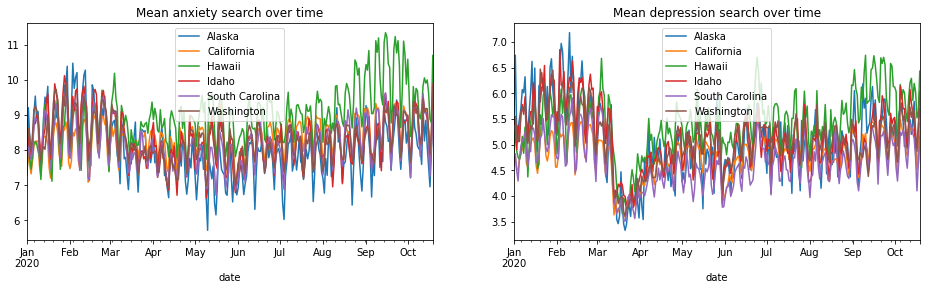

In [15]:
states_to_use = ['Hawaii', 'California', 'Alaska', 'Washington', 'Idaho', 'South Carolina']
state_filter = symptoms_df['State'].isin(states_to_use)
fig,ax=plt.subplots(1,2, figsize=(16,4))
anxiety_plot=symptoms_df[state_filter].groupby('State')['anxiety'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="Mean anxiety search over time")


depression_plot=symptoms_df[state_filter].groupby('State')['depression'].plot(ax=ax[1], 
                                                              legend=True,
                                                             title="Mean depression search over time")

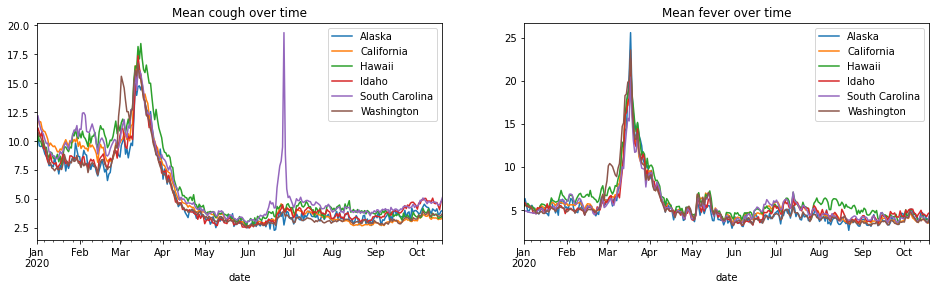

In [16]:
states_to_use2 = ['Hawaii', 'California', 'Alaska', 'Washington', 'Idaho', 'South Carolina']
state_filter2 = symptoms_df['State'].isin(states_to_use2)
fig,ax=plt.subplots(1,2, figsize=(16,4))
cough_plot=symptoms_df[state_filter2].groupby('State')['cough'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="Mean cough over time")


fever_plot=symptoms_df[state_filter2].groupby('State')['fever'].plot(ax=ax[1], 
                                                              legend=True,
                                                             title="Mean fever over time")

## Observations

### Mean anxiety over time:
- All over the place, some later spikes in September/October

### Mean depression search over time
- Dip in late march but steady incline and spikes in September/October

### Mean cough search over time
- More consistent numbers, large spike in March, leveled off and then a large spike in search in July

### Mean fever search over time
- Large spike in fever search in late March, small spike in late May and rise again in late July

### Looking at the _national_ average of symptom searches and how they compare

In [17]:
#reset the index 
symptoms_df.set_index('State', inplace = True)

#take the NATIONAL by day average for searching 'anxiety' 'fever' 'depression' and 'cough'

national_byday = symptoms_df.groupby('date')[['anxiety', 'depression', 'cough', 'fever']].mean()
national_byday

,anxiety,depression,cough,fever
date,,,,
2020-01-01,6.9054,4.4970,9.5384,4.5284
2020-01-02,7.4624,4.5464,9.9776,4.6304
2020-01-03,7.0736,4.2120,9.7374,4.5204
2020-01-04,6.7426,4.1634,9.5816,4.5078
2020-01-05,7.1342,4.4074,9.1776,4.4554
...,...,...,...,...
2020-10-15,7.9406,4.6984,3.6982,3.6686
2020-10-16,7.2072,4.3144,3.5840,3.4772
2020-10-17,6.5428,3.9258,3.6434,3.3180


<AxesSubplot:xlabel='date'>

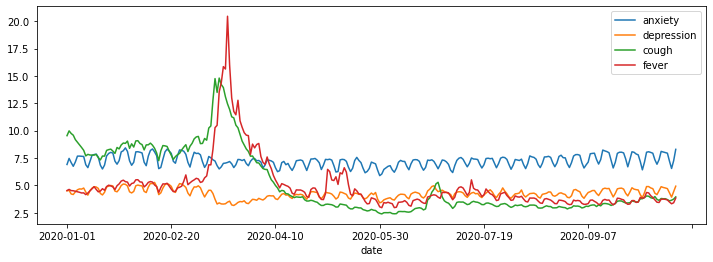

In [18]:
#plot gives time course of mean searches nationally

national_byday.plot(figsize=(12,4))

In [19]:
#Take the correlation of symptoms
national_byday.corr()

,anxiety,depression,cough,fever
anxiety,1.000000,0.783481,0.191766,-0.008752
depression,0.783481,1.000000,0.055754,-0.396821
cough,0.191766,0.055754,1.000000,0.711095
fever,-0.008752,-0.396821,0.711095,1.000000


## Observations
* Not a significant correlation between the symptoms but there is still an interesting relationships 
* Large spike in mean searches for fever and cough in late March
* Consistent waves of searches for anxiety throughout the year

## We can use the COVID 19 data to come to more conclusions about relationships between death/case rates and searches for anxiety and depression in the months of March, July, and September and October

# Now lets take a look at the COVID-19 cases and death rates data
* explore shape, columns, rows

In [20]:
covid_df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
11644,2020-10-15,Virginia,162941,3388
11645,2020-10-15,Washington,100838,2331
11646,2020-10-15,West Virginia,19082,393
11647,2020-10-15,Wisconsin,171480,1568


In [21]:
covid_df.shape

(11649, 4)

In [22]:
covid_df.columns

Index(['date', 'state', 'cases', 'deaths'], dtype='object')

In [23]:
#Index by date and group by months and state
covid_df.index= pd.DatetimeIndex(covid_df['date'])
bymonthly_state = covid_df.groupby('state').resample('M').mean()
bymonthly_state

cases       deaths
state   date                                 
Alabama 2020-03-31    322.578947     2.210526
        2020-04-30   4172.200000   134.800000
        2020-05-31  12001.064516   465.741935
        2020-06-30  26676.233333   789.900000
        2020-07-31  61881.806452  1239.870968
...                          ...          ...
Wyoming 2020-06-30   1123.800000    18.500000
        2020-07-31   2063.870968    22.903226
        2020-08-31   3301.806452    31.967742
        2020-09-30   4668.533333    45.833333
        2020-10-31   7151.666667    54.133333

[422 rows x 2 columns]

## Look at the rankings of COVID 19 cases and death means by state

In [24]:
#cases mean in states
statecases_mean = covid_df.groupby('state')['cases'].mean()
statecases_mean

#rank highest to lowest cases mean
statecases_mean.sort_values(ascending=False)

state
New York                331773.174672
California              282059.516981
Florida                 274923.475983
Texas                   264709.748988
New Jersey              143132.287611
Illinois                120123.921053
Georgia                 118313.302632
Pennsylvania             87924.156250
North Carolina           82015.000000
Arizona                  81742.799242
Louisiana                78921.416290
Massachusetts            77235.492248
Michigan                 72784.881818
Tennessee                72081.137778
Virginia                 66458.524664
Ohio                     66224.828054
Maryland                 63877.644444
Alabama                  61024.986175
South Carolina           56344.540179
Indiana                  53470.299107
Missouri                 42994.201794
Minnesota                40668.281250
Mississippi              40497.077626
Wisconsin                39738.559055
Connecticut              38613.981982
Iowa                     35260.819820
Washin

In [25]:
#Top 5 States with highest mean cases
statecases_mean.sort_values(ascending=False).head()

state
New York      331773.174672
California    282059.516981
Florida       274923.475983
Texas         264709.748988
New Jersey    143132.287611
Name: cases, dtype: float64

In [26]:
#Bottom 5 states with lowest mean cases
statecases_mean.sort_values(ascending=False).tail()

state
Hawaii     3498.825893
Alaska     2923.642202
Maine      2915.431193
Wyoming    2200.566210
Vermont    1128.986547
Name: cases, dtype: float64

In [27]:
#deaths mean in states
statedeath_mean = covid_df.groupby('state')['deaths'].mean()
statedeath_mean

#rank highest to lowest mean
statedeath_mean.sort_values(ascending=False)

state
New York                24799.091703
New Jersey              11065.004425
California               5859.554717
Massachusetts            5415.972868
Florida                  5316.554585
Pennsylvania             5216.580357
Texas                    5078.619433
Michigan                 5024.836364
Illinois                 4614.390977
Connecticut              3300.198198
Louisiana                3128.900452
Georgia                  2959.118421
Ohio                     2555.647059
Maryland                 2458.217778
Indiana                  2171.633929
Arizona                  1999.162879
Virginia                 1600.520179
North Carolina           1475.524229
Colorado                 1336.800000
Mississippi              1281.890411
South Carolina           1269.022321
Minnesota                1160.785714
Alabama                  1153.562212
Washington               1070.739777
Missouri                 1001.672646
Tennessee                 876.764444
Rhode Island              681.59

In [28]:
#Top 5 States with highest mean deaths
statedeath_mean.sort_values(ascending=False).head()

state
New York         24799.091703
New Jersey       11065.004425
California        5859.554717
Massachusetts     5415.972868
Florida           5316.554585
Name: deaths, dtype: float64

In [29]:
#Bottom 5 states with lowest mean deaths
statedeath_mean.sort_values(ascending=False).tail()

state
Montana    56.903226
Vermont    47.112108
Hawaii     39.379464
Wyoming    22.031963
Alaska     19.050459
Name: deaths, dtype: float64

## Look individually at trends over time for certain states that have had the most deaths and cases
### Mean cases (highest and lowest)
* New York, California, Florida, Texas and New Jersey have had the most mean cases
* Vermont, Wyoming, Maine, Alaska and Hawaii had the lowest mean cases

### Mean deaths (highest and lowest)
* New York, New Jersey, California, Massachusetts and Florida have had the most mean deaths
* Alaska, Wyoming, Hawaii, Vermont and Montana had the lowest mean death rates

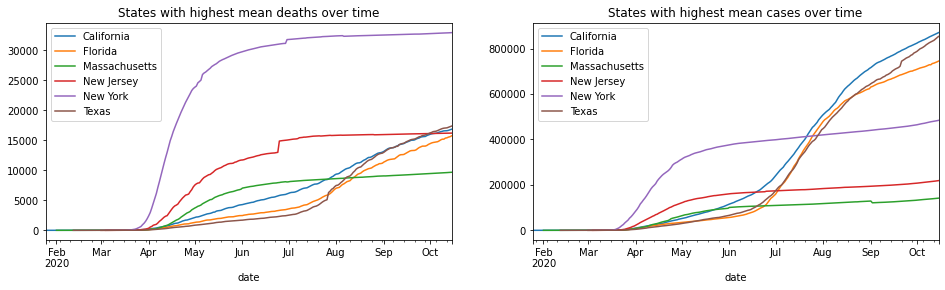

In [30]:
#Highest deaths and cases over time
states_to_use = ['New York', 'New Jersey', 'California', 'Massachusetts', 'Florida', 'Texas']
state_filter = covid_df['state'].isin(states_to_use)
fig,ax=plt.subplots(1,2, figsize=(16,4))
ts_plot=covid_df[state_filter].groupby('state')['deaths'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="States with highest mean deaths over time")
ts2_plot=covid_df[state_filter].groupby('state')['cases'].plot(ax=ax[1], 
                                                                   legend=True,
                                                                  title="States with highest mean cases over time")


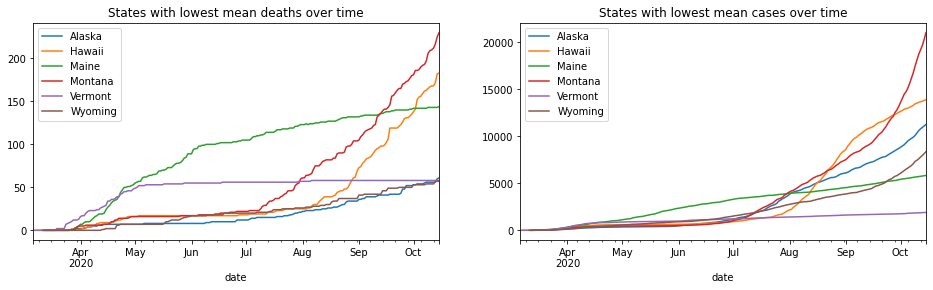

In [31]:
#Lowest deaths and cases over time
states_to_use2 = ['Alaska', 'Hawaii', 'Vermont', 'Wyoming', 'Montana', 'Maine']
state_filter2 = covid_df['state'].isin(states_to_use2)
fig,ax=plt.subplots(1,2, figsize=(16,4))
ts_plot1=covid_df[state_filter2].groupby('state')['deaths'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="States with lowest mean deaths over time")
ts2_plot2=covid_df[state_filter2].groupby('state')['cases'].plot(ax=ax[1], 
                                                                   legend=True,
                                                                  title="States with lowest mean cases over time")

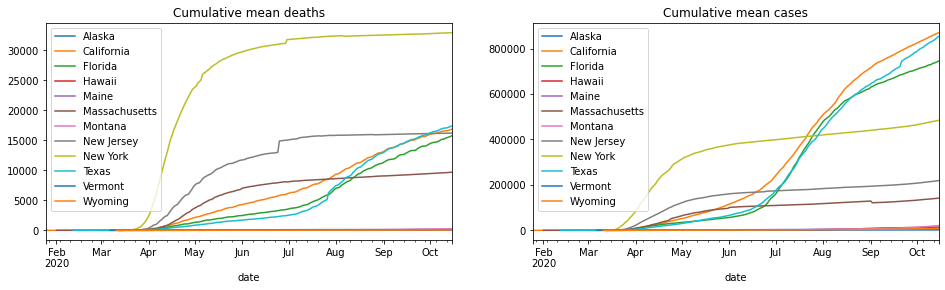

In [32]:
#Highest and lowest deaths and cases over time
states_to_use3 = ['New York', 'New Jersey', 'California', 'Massachusetts', 'Florida', 'Texas', 'Alaska', 'Hawaii', 'Vermont', 'Wyoming', 'Montana', 'Maine']
state_filter3 = covid_df['state'].isin(states_to_use3)
fig,ax=plt.subplots(1,2, figsize=(16,4))
ts_plot2=covid_df[state_filter3].groupby('state')['deaths'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="Cumulative mean deaths")
ts2_plot3=covid_df[state_filter3].groupby('state')['cases'].plot(ax=ax[1], 
                                                                   legend=True,
                                                                  title="Cumulative mean cases")

### Observations

### Top states with highest mean cases and deaths over time:
* New York was one of the first states to spike in deaths and cases in early April-May and continues to climb
* Other states followed the late adoption to deaths around June/July
* Cases spiked later for top states in July/August and continues to climb

### Bottom states with lowest mean cases and deaths over time:
* Relatively low adoption of cases and deaths compared to top states
* Interesting spike in deaths for Maine and Vermont in May/June months
* Steady incline in increase of cases in September/October months

### Combination plot of top and bottom states with highest and lowest mean cases and deaths over time:
* Although the lowest states might have seemed like there was a large spike in their populations, in comparison to the states with the top mean cases and deaths, it is minor
* The uptick in cases begins July/August
* The uptick in deaths begins late April-June

# The months of early April and July and August are of particular interest with regards to COVID 19 cases and deaths

### The next step is to compare cases/death months in covid_df to spikes in symptom searches from  symptoms_df to see if there is a relationship between increases in mean searches for 'stress' and 'anxiety' and cases/deaths

### Merge 'symptoms_df' and 'covid_df' 

In [33]:
symptoms_df['date']= pd.to_datetime(symptoms_df['date'])
symptoms_df

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State Code,Region,Division
State,,,,,,,,,,,
Alaska,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,AK,West,Pacific
Alaska,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,AK,West,Pacific
Alaska,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,AK,West,Pacific
Alaska,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,AK,West,Pacific
Alaska,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,AK,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,WY,West,Mountain
Wyoming,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,WY,West,Mountain
Wyoming,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,WY,West,Mountain


In [34]:
full_merged = covid_df.drop(columns='date').merge(symptoms_df, right_on=['date','State'], left_on=['date', 'state'])

In [35]:
full_merged

,date,state_x,cases,deaths,state_y,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State Code,Region,Division
0,2020-01-21,Washington,1,0,US-WA,9.72,8.85,6.25,5.33,1.37,2.40,WA,West,Pacific
1,2020-01-22,Washington,1,0,US-WA,9.73,8.40,6.24,5.18,1.37,2.39,WA,West,Pacific
2,2020-01-23,Washington,1,0,US-WA,9.46,8.18,6.17,5.06,1.32,2.39,WA,West,Pacific
3,2020-01-24,Illinois,1,0,US-IL,7.22,8.23,4.45,4.66,1.04,1.97,IL,Midwest,East North Central
4,2020-01-24,Washington,1,0,US-WA,8.52,7.95,5.57,4.83,1.14,2.23,WA,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,2020-10-15,Virginia,162941,3388,US-VA,8.51,3.61,4.93,3.44,1.27,1.73,VA,South,South Atlantic
11426,2020-10-15,Washington,100838,2331,US-WA,9.18,3.60,5.65,3.94,1.20,2.01,WA,West,Pacific
11427,2020-10-15,West Virginia,19082,393,US-WV,8.21,4.34,5.31,3.80,1.53,2.21,WV,South,South Atlantic
11428,2020-10-15,Wisconsin,171480,1568,US-WI,7.27,3.69,4.23,3.66,1.05,1.53,WI,Midwest,East North Central


### Taking inspiration from https://towardsdatascience.com/heartbreak-monday-blues-and-pytrends-f1a398591a79 we want to put the merged dataset into a heatmap for final presentation

In [36]:
full_merged_sorted=full_merged.reset_index().sort_values(['state_x','date'])

In [37]:
# 1. calculate the difference (new cases/deaths)
full_merged_sorted[['new_cases','new_deaths']]=full_merged_sorted.groupby('state_x')[['cases','deaths']].diff()

In [38]:
#1. calculate the difference (new cases/deaths)
full_merged_sorted[['new_cases','new_deaths']]=full_merged_sorted.groupby('state_x')[['cases','deaths']].diff()

In [39]:
full_merged_sorted[['new_cases','new_deaths']]=full_merged_sorted.groupby('state_x')[['cases','deaths']].diff()

### Plot the new_cases per state and new_deaths per state

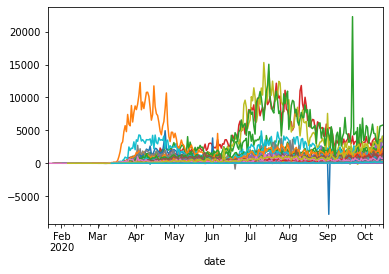

In [40]:
#Plot new_cases for all states 
full_merged=full_merged_sorted.set_index(full_merged_sorted['date'])
full_merged.groupby('state_x')['new_cases'].plot();

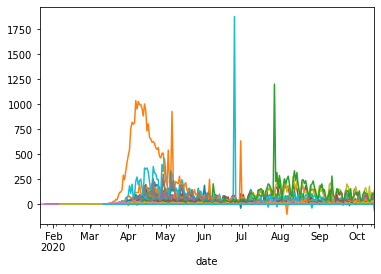

In [41]:
#Plot new_deaths of all states
full_merged=full_merged_sorted.set_index(full_merged_sorted['date'])
full_merged.groupby('state_x')['new_deaths'].plot();

### Observations:
* Appears as though April, May and July- August have high increasing death and case rates
* Some spikes in death for an unknown state in late June/July 
* Random case spikes in September/October

* Look at different states individually for 'new_cases' and 'new_deaths' over time

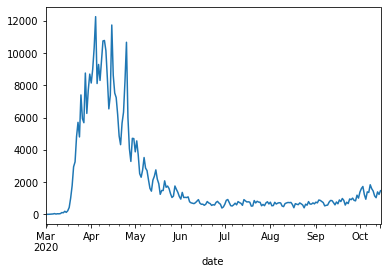

In [42]:
#new_cases in NY
ny_filter = full_merged['state_x'] == 'New York'
full_merged[ny_filter]['new_cases'].plot();

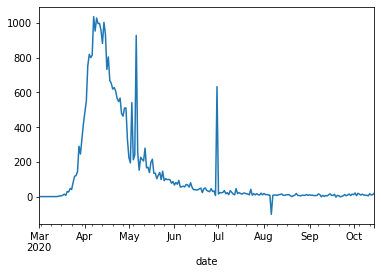

In [43]:
#new_deaths in NY
ny_filter2 = full_merged['state_x'] == 'New York'
full_merged[ny_filter2]['new_deaths'].plot();

### 1 and 2. new_cases and new_deaths exploration
* Explore new_cases and new_deaths (taking the most interesting relationships from the exploration 'COVID_and_symptoms_merged.ipynb')
* Explore correlations for symptoms for top5_states and bottom5_states with regards to 'new_cases' and 'new_deaths' by plotting on heat maps
    * 1a/2a. 'cough' 
    * 1b/2b. 'fever' 
    * 1c/2c. 'anxiety' 
    * 1d/2d. 'depression' 
* Also look at how all states rank in search for symptoms over time

### Next step is to create a correlation by month table by selecting the two columns

### 1a. Look at 'cough' and 'new_cases'

In [44]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'cough']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['cough'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.774142,-0.090492,-0.141173,0.447816,-0.056908,0.328910,-0.280340,-0.385406
Alaska,-0.768965,0.546471,-0.164468,0.452291,-0.014969,-0.248371,0.188001,-0.158155
Arizona,-0.509302,-0.353042,-0.413045,0.673697,0.598260,0.342063,-0.016470,-0.153356
California,-0.510016,-0.286130,-0.663179,0.852054,-0.017322,0.400086,-0.280631,0.224697
Colorado,-0.736368,-0.335805,0.155877,0.527040,0.145468,0.143185,0.579066,0.077062


* The data ranges from March to Early October 2020
* Then you can select a list of states to turn into a heatmap plot

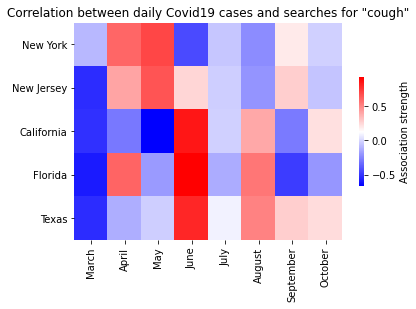

In [45]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

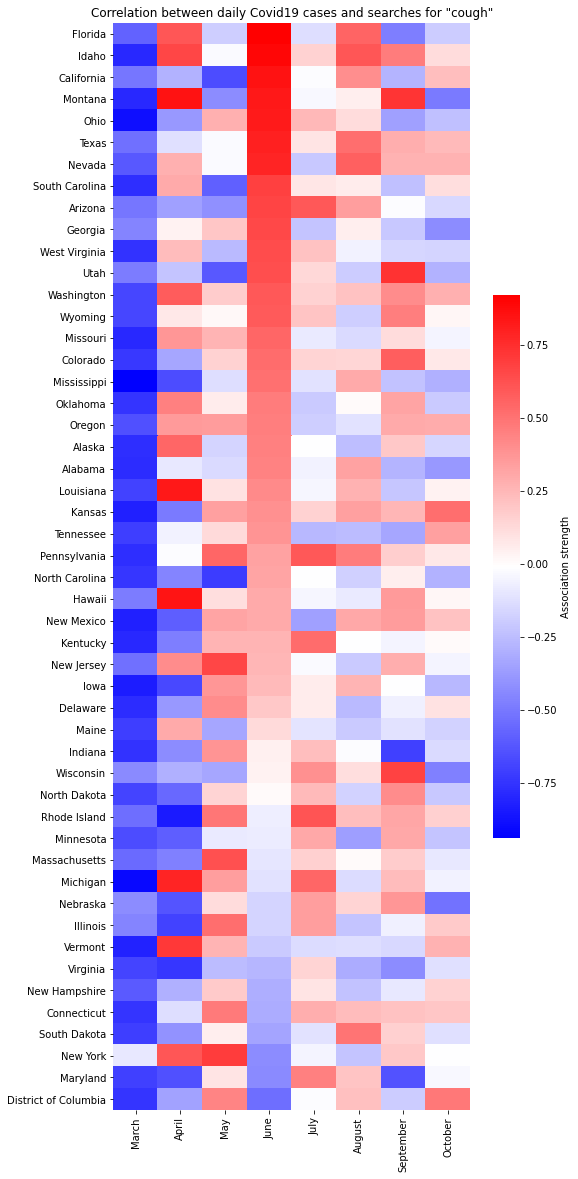

In [46]:
# set the ratio of the plot and plot all of the states, focusing on the month of June
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "cough"');

### Observations:
* June had a high correlations between multiple states and the search for 'cough'

* It appears as though the states with the top number of cases searched for 'cough' more frequently during the year than the states that did not have as high of COVID 19 case numbers

### 2a. Look at 'new_deaths' and 'cough'

In [47]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'cough']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['cough'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.507311,-0.174284,0.430943,0.055923,0.085700,0.308601,-0.183387,0.007168
Alaska,-0.477947,0.333742,-0.062265,0.181109,-0.180976,-0.086293,0.174493,-0.134193
Arizona,-0.376067,-0.270521,0.329249,0.384444,-0.222252,0.048031,-0.076829,-0.146442
California,-0.486004,-0.603589,0.159621,0.109410,-0.066408,0.230092,0.097492,0.020473
Colorado,-0.600850,-0.237584,0.300928,-0.345398,0.306634,0.068854,0.197815,0.271912


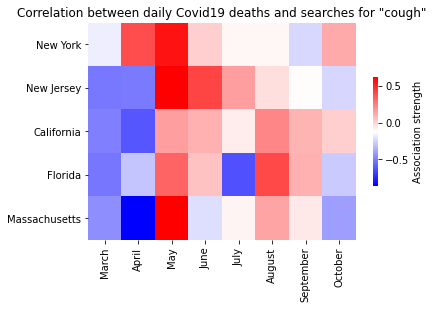

In [48]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');



* Interesting to see that the states that had the least amount of deaths seem to have searched for more symptoms relating to COVID than the states that had the most cases/deaths

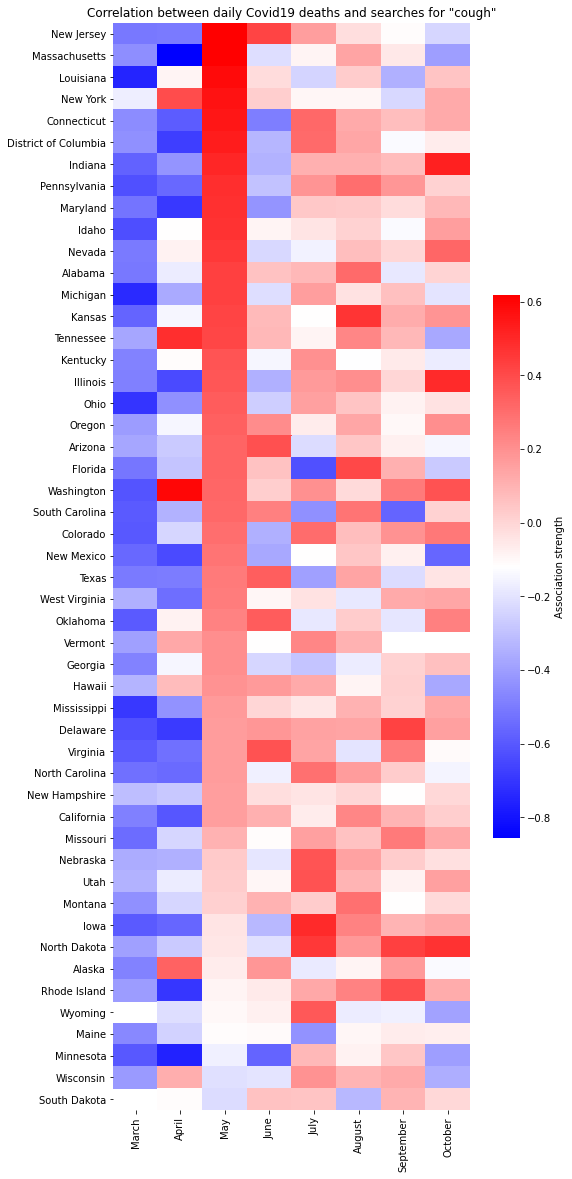

In [49]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('May', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "cough"');

## 1b. Look at symptom 'fever' and 'new_cases'

In [50]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'fever']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['fever'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.640045,-0.086472,-0.271488,0.473388,-0.028868,0.056548,-0.145034,-0.572533
Alaska,-0.467672,0.450154,-0.333369,0.240125,-0.225063,-0.197989,-0.088333,-0.452120
Arizona,0.054289,-0.338632,-0.143055,0.698581,0.449806,0.529262,0.120342,-0.246500
California,0.014050,-0.177208,-0.288734,0.903204,-0.140833,0.590949,0.057076,-0.005993
Colorado,-0.276771,-0.324638,0.191071,0.256532,0.126629,0.312424,0.348407,-0.304272


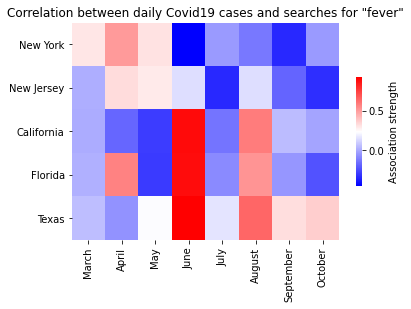

In [51]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

* Not many states either in the top 5 or the bottom 5 of cases had high searches for 'fever'

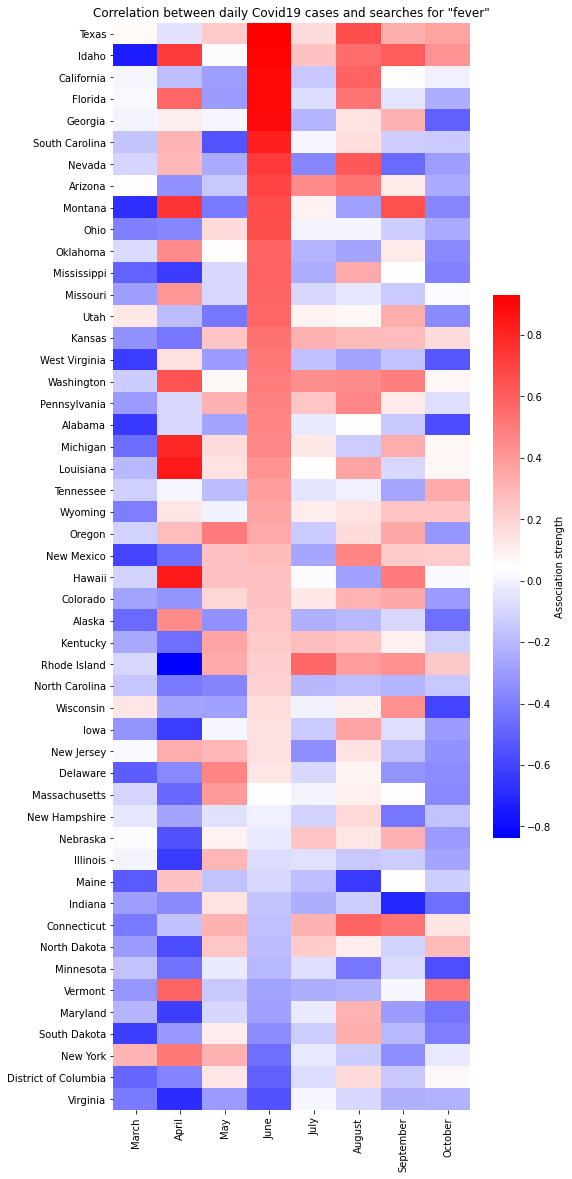

In [52]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "fever"');

## Observations: 
* other states not within the top 5 and bottom 5 for cases were searching for 'fever' in June

### 2b. Look at relationship between new_deaths and "fever"

In [53]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'fever']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['fever'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,-0.472108,-0.054374,0.504523,0.164032,0.030294,0.265664,0.065734,0.035262
Alaska,-0.326938,0.242008,0.274444,0.297896,-0.310928,-0.120563,-0.269875,0.075154
Arizona,0.006004,-0.247029,0.383288,0.378423,-0.292445,0.114995,-0.006530,-0.005818
California,-0.004222,-0.498778,0.265304,0.235208,-0.102628,0.377902,0.289872,0.035161
Colorado,-0.262308,-0.203168,0.433285,0.226456,0.164402,0.097957,0.561572,0.106842


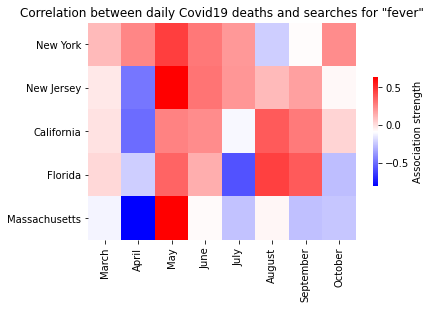

In [54]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');

* States with less amount of incremental deaths are not as widely searching for COVID syptoms

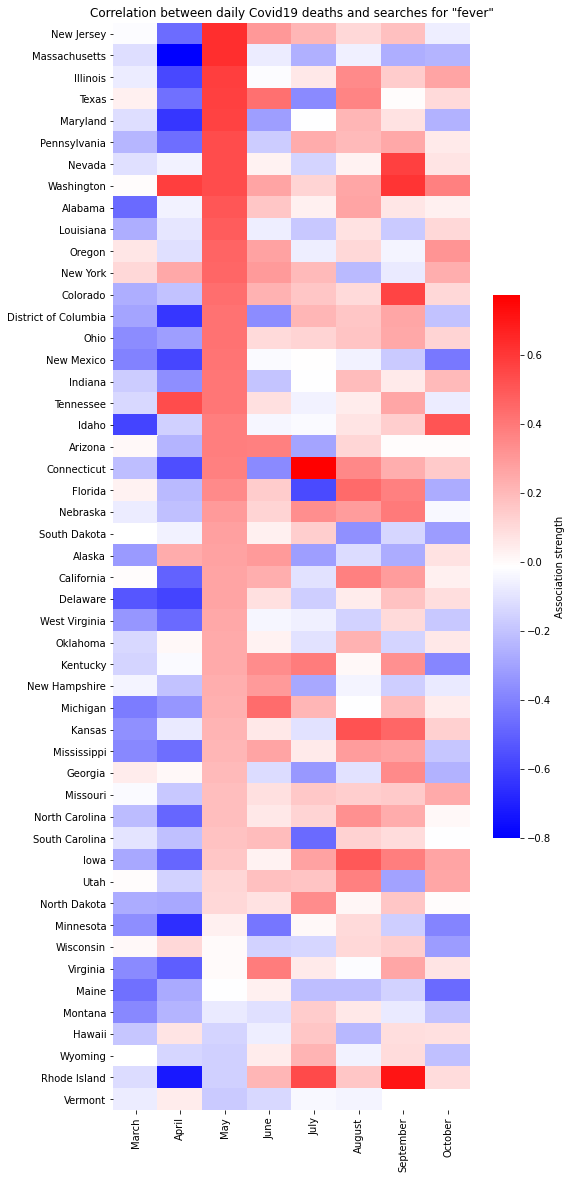

In [55]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('May', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "fever"');

* Not as much of a correlation as the inital heat map let on

## 1c. Look at different symptoms: 'anxiety' and 'new_cases'

In [56]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'anxiety']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['anxiety'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.401391,0.106840,0.169279,0.314993,0.054365,-0.166553,-0.291761,-0.602883
Alaska,0.346755,0.081527,-0.185098,0.005371,0.000018,-0.626947,-0.269881,-0.030010
Arizona,-0.010627,0.030260,-0.331766,0.245332,-0.237730,-0.372836,0.055513,0.069228
California,0.168341,0.462605,-0.322766,0.529055,0.235106,0.063940,0.011144,-0.093561
Colorado,-0.012042,-0.201848,-0.141711,-0.087600,0.207917,-0.110482,0.395965,0.161207


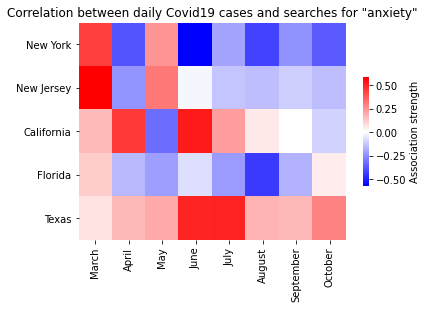

In [57]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

* does not appear to be a standout month that top or bottom case states were searching for 'anxiety'

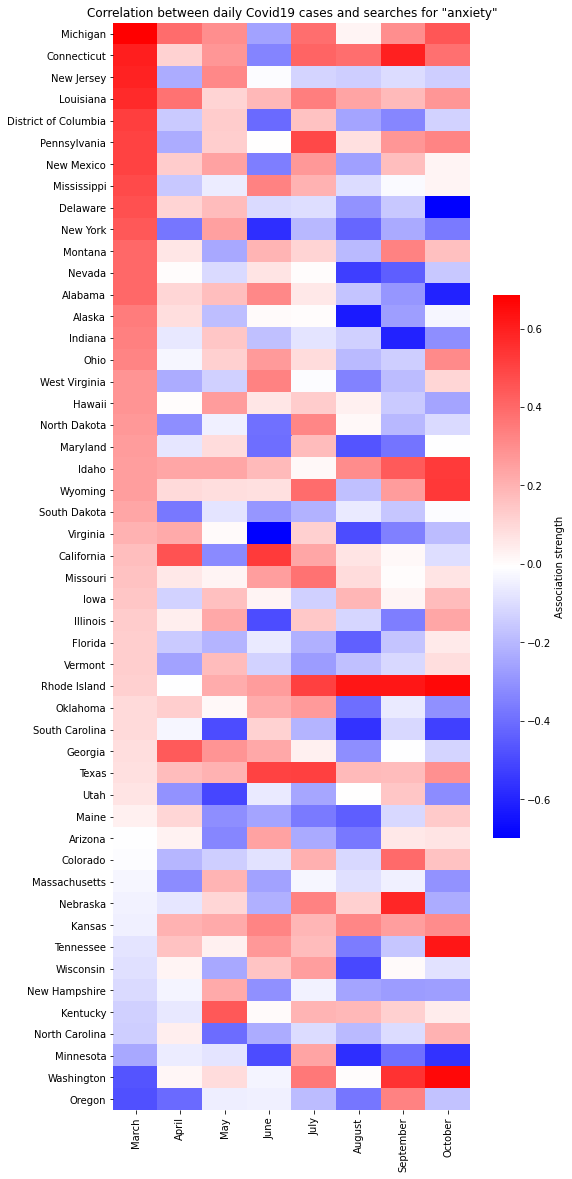

In [58]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('March', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "anxiety"');

## Observations
* Many states were searching for 'anxiety' at the start of the pandemic-- was this due to the pandemic or was it due to regular circumstances?

### 2c. Look at relationship between new_deaths and "anxiety"

In [59]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'anxiety']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['anxiety'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.369730,0.310077,0.390379,0.175098,0.289335,0.105815,0.122084,0.315914
Alaska,0.017446,-0.166886,0.268363,0.005539,-0.223866,0.063525,-0.183061,0.167172
Arizona,0.012865,0.037100,0.195243,0.185694,0.055506,-0.047047,-0.056742,-0.023656
California,0.153548,0.153621,0.281850,0.256226,0.516665,0.278099,0.394341,0.139827
Colorado,-0.066896,0.135936,0.422586,0.152600,0.236425,0.121644,0.358223,0.343936


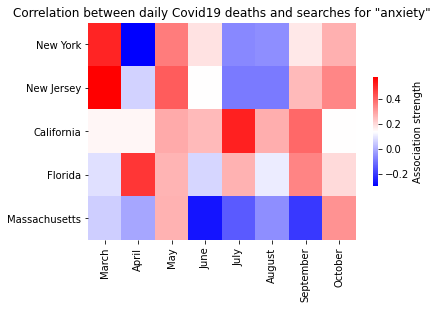

In [60]:
# Plot the top5_states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');


* Not many standout months for deaths and anxiety

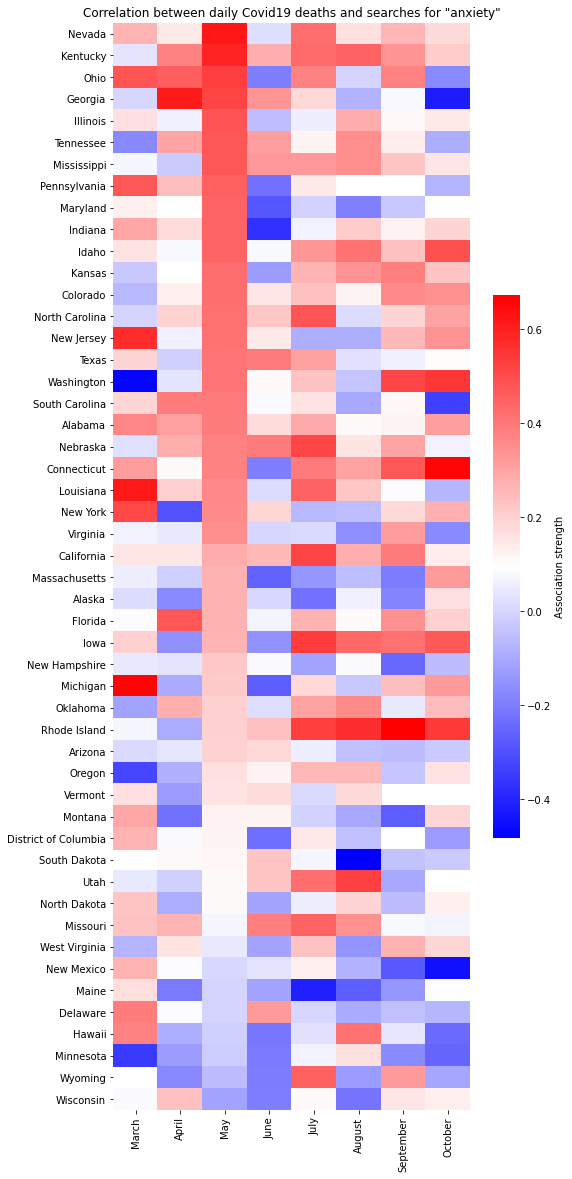

In [61]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('May', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "anxiety"');

* Deaths do not have as interesting of a graph as cases and anxiety-- in final presentation use cases graph

## 1d. Look at different symptoms: 'depression' and 'new_cases'

In [62]:
# 1 use the 'full_merged'

# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_cases', 'depression']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['depression'].unstack()['new_cases'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.409252,0.057418,0.200113,0.470226,-0.281947,-0.223156,-0.268183,-0.654898
Alaska,0.090398,0.138812,-0.162987,0.116190,0.063964,-0.250006,-0.328536,-0.234062
Arizona,-0.349400,0.220158,-0.581561,0.465220,-0.280163,-0.424995,0.027327,0.124299
California,-0.387010,0.300275,-0.513964,0.669628,0.205811,0.009087,-0.126183,-0.243368
Colorado,-0.363271,-0.135158,-0.263088,0.284609,-0.092085,0.123059,0.369326,0.157325


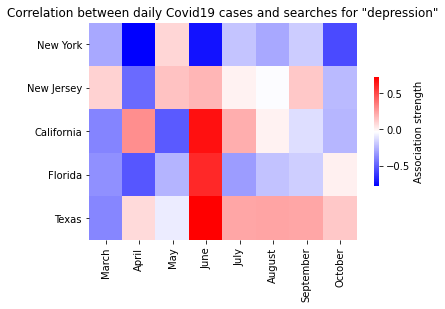

In [63]:
# Plot the top5_states for 'new_cases'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_cases = ['New York', 'New Jersey', 'California', 'Florida', 'Texas']
bottom5_cases = ['Maine', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_cases], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

* No obvious month for 'depression' in either the top or the bottom case states, but we'll explore one

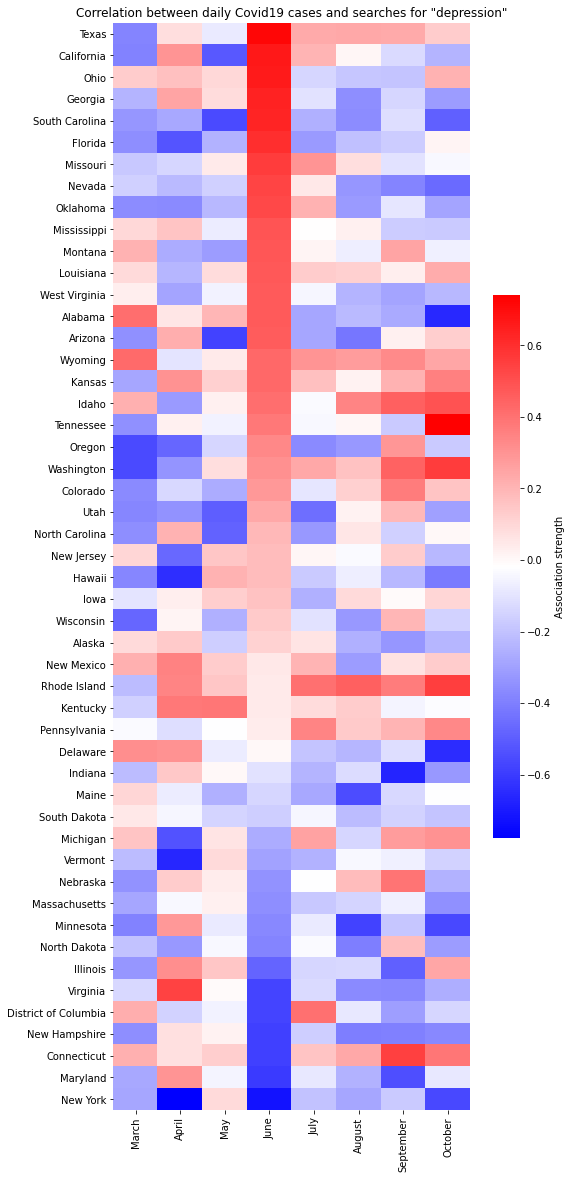

In [64]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('June', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 cases and searches for "depression"');

## Observations:
* High 'depression' serach in April amongst some but not all of the 'top_cases' states

### 2d. Look at relationship between new_deaths and "depression"

In [65]:
# 2 group by state and month 
grouped_data=full_merged.groupby(['state_x',full_merged.index.month])[['new_deaths', 'depression']]

# 3 calculate correlation between cases and symptom
ctable = grouped_data.corr()['depression'].unstack()['new_deaths'].unstack()

# drop Jan and Feb (odd there is data just for a few states in these months)
ctable = ctable.drop(columns=[1,2])

# rename columns with month names intead of numbers
ctable.columns = [calendar.month_name[c] for c in ctable.columns]

# 4 create heatmap
ctable.head()

,March,April,May,June,July,August,September,October
state_x,,,,,,,,
Alabama,0.586241,0.291689,0.153771,0.137830,0.117332,0.020314,0.075524,0.095754
Alaska,0.366049,0.060845,0.204596,0.144038,-0.290917,0.132085,-0.180975,0.069810
Arizona,-0.248083,0.105566,0.027415,0.294476,-0.012133,-0.040307,-0.122512,-0.257042
California,-0.342565,0.425523,0.091523,0.121350,0.317824,0.187016,0.226171,-0.024749
Colorado,-0.216318,0.107441,0.305373,-0.413541,0.123202,0.006615,0.247527,0.170622


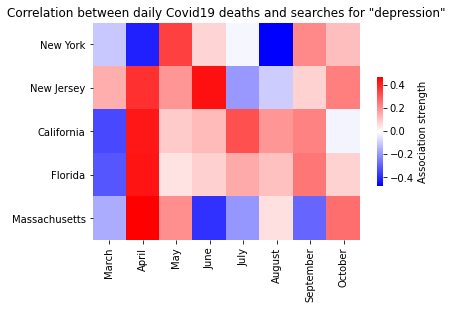

In [66]:
# Plot top5_deaths states for 'new_deaths'

states_to_use = ['Maine','New York', 'New Jersey', 'Florida', 'California','Texas']

top5_deaths = ['New York', 'New Jersey', 'California', 'Florida', 'Massachusetts']
bottom5_deaths = ['Montana', 'Vermont', 'Hawaii', 'Wyoming', 'Alaska']

#plt.figure(figsize=(8,6))
sns.heatmap(ctable.loc[top5_deaths], cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');

* Top 5 states with most deaths had a lot of searches in the month of April, the states with the bottom 5 death rate did not share the same intensive searches for depression

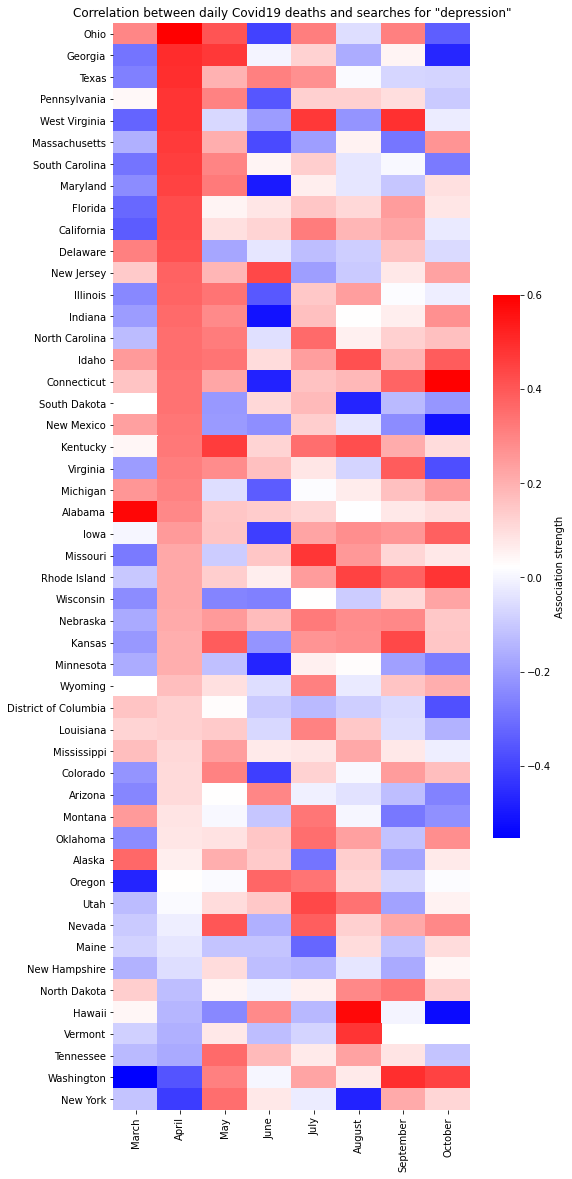

In [67]:
# set the ratio of the plot
plt.figure(figsize=(8,20))
sns.heatmap(ctable.sort_values('April', ascending=False), cmap='bwr', 
            cbar_kws={'shrink': 0.5, 'label': 'Association strength'})
plt.ylabel('')
plt.xlabel('')
plt.title('Correlation between daily Covid19 deaths and searches for "depression"');

### Observations:
* The month of April has many states with a stronger correlation between seraching for 'depression' and increase in deaths due to COVID 

### Overall it seems as though June was the month when people were searching for COVID related symptoms such as 'cough' 'fever' and 'anxiety' and 'depression' were searched for in the earlier months of the year like March and April

* The physical symptom searches were popular during the early summer months when the spikes in cases and deaths were increasing

* The mental symptom searches were in the beginning parts of the year, which could be confounded with seasonal depression months, not just the pandemic
